In [18]:
# Original File name: linearfit_errors.ipynb
# suggested  Mods by Garith Smith April 2023
# Fitting a line to data with errors
# Analytically find the best fitting parameters of a linear fit to the data through the method of ordinary least squares estimation. (i.e. find m and b for y = m*x + b)
# Based on:
# https://github.com/anazalea/phys2300stuff/tree/master/climateData
# https://github.com/anazalea/phys2300stuff/blob/master/climateData/climateChange.ipynb

# Lab #8/9 - Standing Waves I (Mar 4/11)

**Student name:** Liam Murray \
**Student number:** 87357539 \
**Partner:** Alexis Bushfield (Absent Mar 11)

## Section 1: Familiarize
In this stage we get familiar with the equipment, the analysis procedure, and to get a clear big-picture view of the experiment. This will help the rest of the experiment go more smoothly and you will be able to make informed decisions.

### Experimental Goal 🎯:
> Determine the linear mass density of a wire using two different methods: direct measurement and by measuring the speed of waves on this wire when it is under tension. Compare the results of the two methods. 



## Section 2: Measure and Analyze
Here we collect the data and run our analysis. Thanks to our spreadsheets, we can often do the analysis in real time and make on-the-fly decisions on how to best proceed. We will be mindful when we set up our spreadsheet to accommodate additional data. Some questions to ask ourselves when writing in our lab books are: 
- What did we actually do? 
- Did anything unexpected go wrong? 
- What happened? 
- Any qualitative observations on either our data or analysis? 
- How did the trends in our plots change as a result? 
- How did our uncertainty change as a result?

$$v=f\lambda = \sqrt{\frac{T}{\mu}}$$
Wave equation:
$$\frac{\partial^2 h}{\partial z^2} = \frac{1}{v^2}\frac{\partial^2h}{\partial t^2}$$

**Measurement Plan:**
1. Using incremental masses from 50g to 450 in 50g increments.
2. Find resonant frequency by using Synthesized Function Generator. We plan to find the middle value of stable frequencies.
    - Uncertainty will be found by finding the outer bounds when the function becomes unstable and finding the variation from the midpoint.



## Setup and Data Entry:

First, import numpy (standard scientific/numerical python library) and matplotlib (standard plotting python library).

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%matplotlib inline

Now lets import our data from a .csv file (comma-separated variables). Some tips:
- Change the name of the *datafile* so it points to the .csv file with your data.
- Make sure that the .csv file is in the same folder as this notebook, or that you specify the absolute path.
- If you have a header line in your .csv file, make sure it has a # in front of it.

In [20]:
#Identifying and reading the data
datafile = "Round 1 Data.csv"
data = np.genfromtxt(datafile, delimiter=",", dtype=float)

Lets create a vector of values (a.k.a. a 1-dimensional numpy array) for each column of the .csv file. These vectors let us do calculations on every data point at once, similar to applying an excel formula to every value in a column.

In [21]:
g = 9.809 #m/s^2

#Making Vectors from the data
mass = data[:, 0] # Make a vector of all elements (:) in the first column (0)
Ft = (mass + 50)/1000 * g
freq = data[:, 1]  # Make a vector of all elements in the second column
wl = 2 * data[:, 3]
y_uncertainty = 2*freq* wl**2 * data[:,4]  # Make a vector of all elements in the third column
print(y_uncertainty)
x_var = Ft # Tension
y_var = (freq * wl)**2 # Velocity^2

[17.1136 20.5184 26.8288 22.5024 69.632  31.0016 61.4016 25.28  ]


## Plotting:

In this case, we will simply use the columns of the .csv file, but in the future you can do some pre-processing calculations at this stage.

Let's add the axis labels, plot title, and the lower and upper limits for the plot axes.

In [22]:
#Preparing the Plots
x_label = "Tension (T)"
y_label = "Velocity (v^2)"
title = "Velocity (v^2) vs. Tension (T)"
xmin = 0
xmax = 4.5
ymin = np.min(y_var)
ymax = np.max(y_var)

Now lets make a graph of y_var vs. x_var, with error bars on the y data.

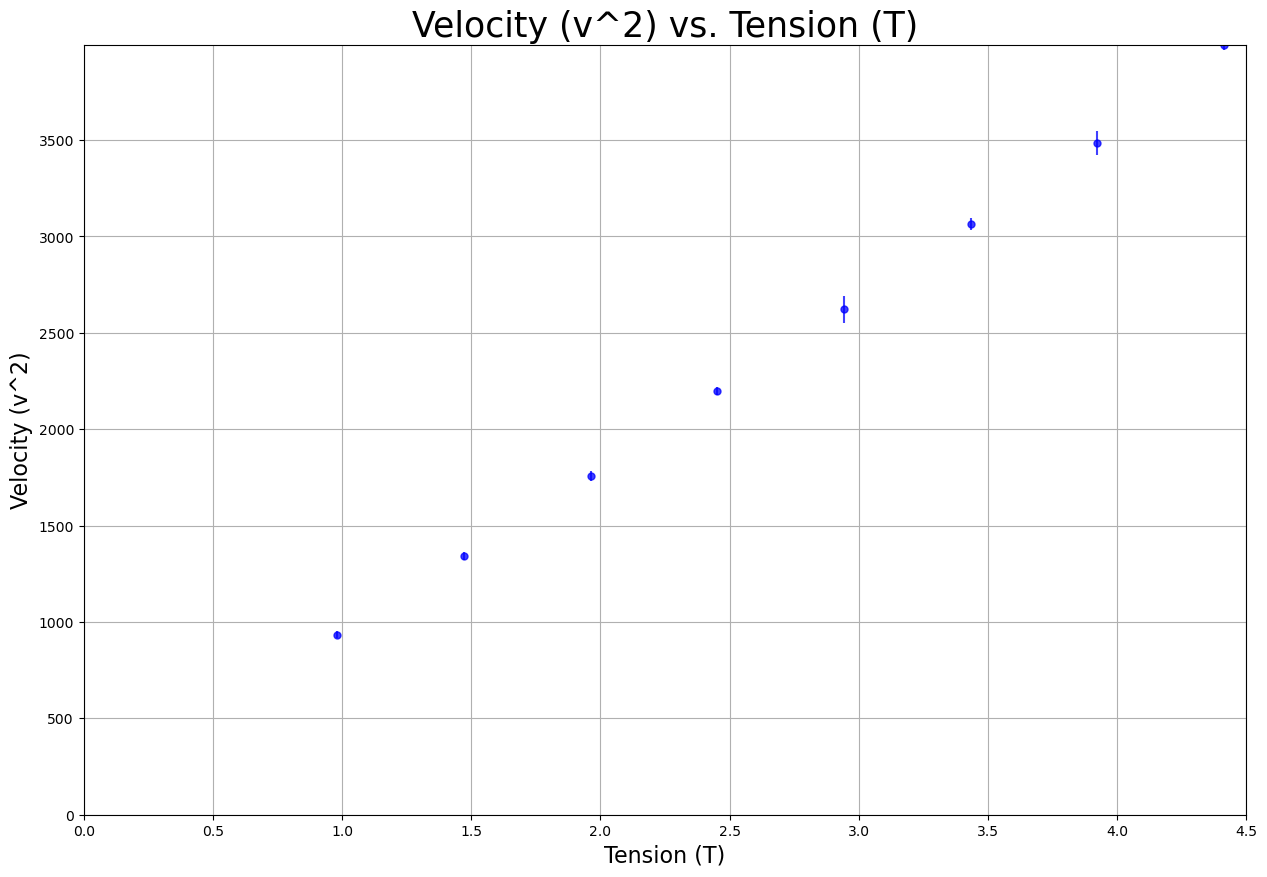

In [23]:
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
plt.ylim(0, ymax)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis

plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot", bbox_inches="tight", dpi=300)  # Saves the figure

## Iterative Fitting:

This section fits the data with a specified model.
You can choose any function to be your model; the currently set function is a linear function.
The iterative fitting algorithm repeatedly guesses the fit parameters, using the method of gradient descent to improve on the previous guess until it converges to a satisfactory fit. 

This block defines the mathematical function which will be used to fit the data. Here it is set to a linear function where the parameter $a$ is the slope and $b$ is the y-intercept. The values of the parameters are not set; the fitter will find the values for these parameters which best fit the data.

In [24]:
def FitFunction(x, a, b):
    y = a*x + b
    return y

n_parameters = 2

Before we use this function to fit our data, we need to set up the fitting routine. We can optionally provide the following pieces of information to help out the fitter:

- A list of lower and upper bounds for the parameters
- A list of initial guesses for the parameters.

Currently the parameter lower bounds and upper bounds (param_bounds) are set to -/+ infinity (np.inf), and the guesses (initial_param) are both set to 1. (You can set each bound and parameter manually; for example for three parameters: initial_guesses = (100, 5, 3).)

In [25]:
#Parameter Bounds ([lower bounds,...],[Upper bounds,...])
param_bounds=([-np.inf, -np.inf],[np.inf, np.inf])  
initial_param=(500,800)  

Now we tell python to try to fit our function to the data, and also calculate errors on each parameter.

In [26]:
optimized_parameters, covariance_matrix = curve_fit(FitFunction, x_var,y_var,
                                                    sigma=y_uncertainty,absolute_sigma=True,
                                                    bounds=param_bounds,p0=initial_param)
parameter_errors = np.sqrt(np.diag(covariance_matrix))

Finally we print out the best fit parameters and their errors.

In [27]:
for i in range(len(optimized_parameters)):
    print(f'Parameter #{i+1}: {optimized_parameters[i]:.6e} ± {parameter_errors[i]:.1e}')

Parameter #1: 8.866214e+02 ± 7.7e+00
Parameter #2: 4.358391e+01 ± 1.9e+01


## Plotting the fit results:

To display the best fit function, we start by defining a range of x values for which to plot the function. We then create an array of 200 points within this x range. For each point, we use the best fit parameters from the previous section to calculate the y value of the function at that point.

In [28]:
# First calculate a reasonable range of x values for our line
x_length = max(x_var) - min(x_var)
x_min_l = min(x_var) - 0.05*x_length
x_max_l = max(x_var) + 0.05*x_length
# Create our array of 200 linearly-spaced points
xForLine = np.linspace(x_min_l,x_max_l,200)
# Calculate the y values of the best fit line
yForLine = FitFunction(xForLine,*optimized_parameters)

Now we are ready to plot the fit function with our data. We repeat the code to plot the previous graph, and then plot our fit function.

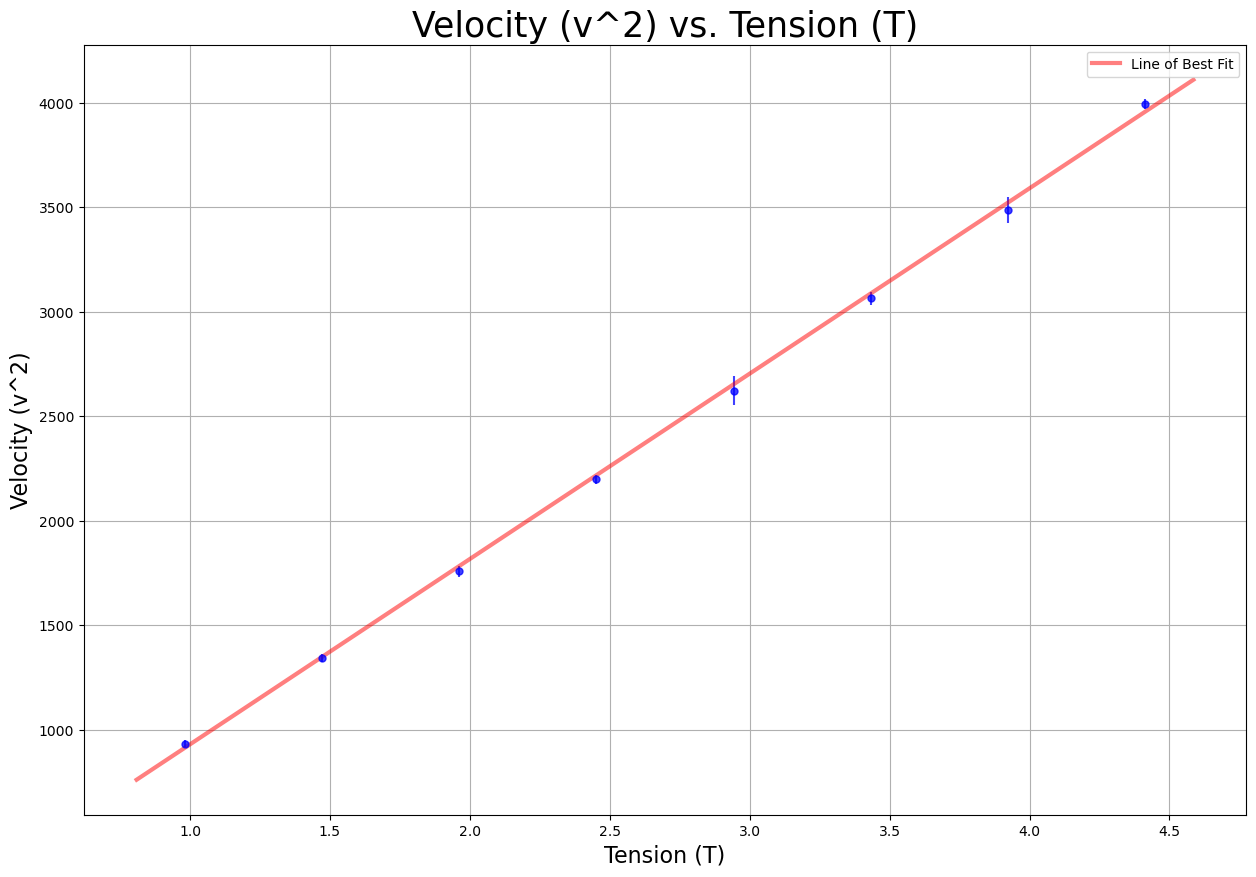

In [29]:
# Plot our data
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
#plt.ylim(ymin, ymax)  # This sets the range of the y-axis
#plt.xlim(xmin, xmax)  # This sets the range of the x-axis

# Add the line to the plot
plt.plot(xForLine, yForLine, lw=3, color="red", alpha=0.5, label="Line of Best Fit")

# Add a legend
plt.legend()
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_fit", bbox_inches="tight", dpi=300)  # Saves the figure

## Diagnosing the goodness-of-fit:

Now lets calculate the residual for each data point, i.e. the difference between the data and the fit function.

In [30]:
residual = y_var - FitFunction(x_var,*optimized_parameters)

Lets plot the residuals graph. Recall that the residuals should be evenly distributed around zero, and there should be no visible trend or pattern in the residuals. Approximately 68% of the error bars should cross zero, and 95% of data points should be within two error bars of zero.

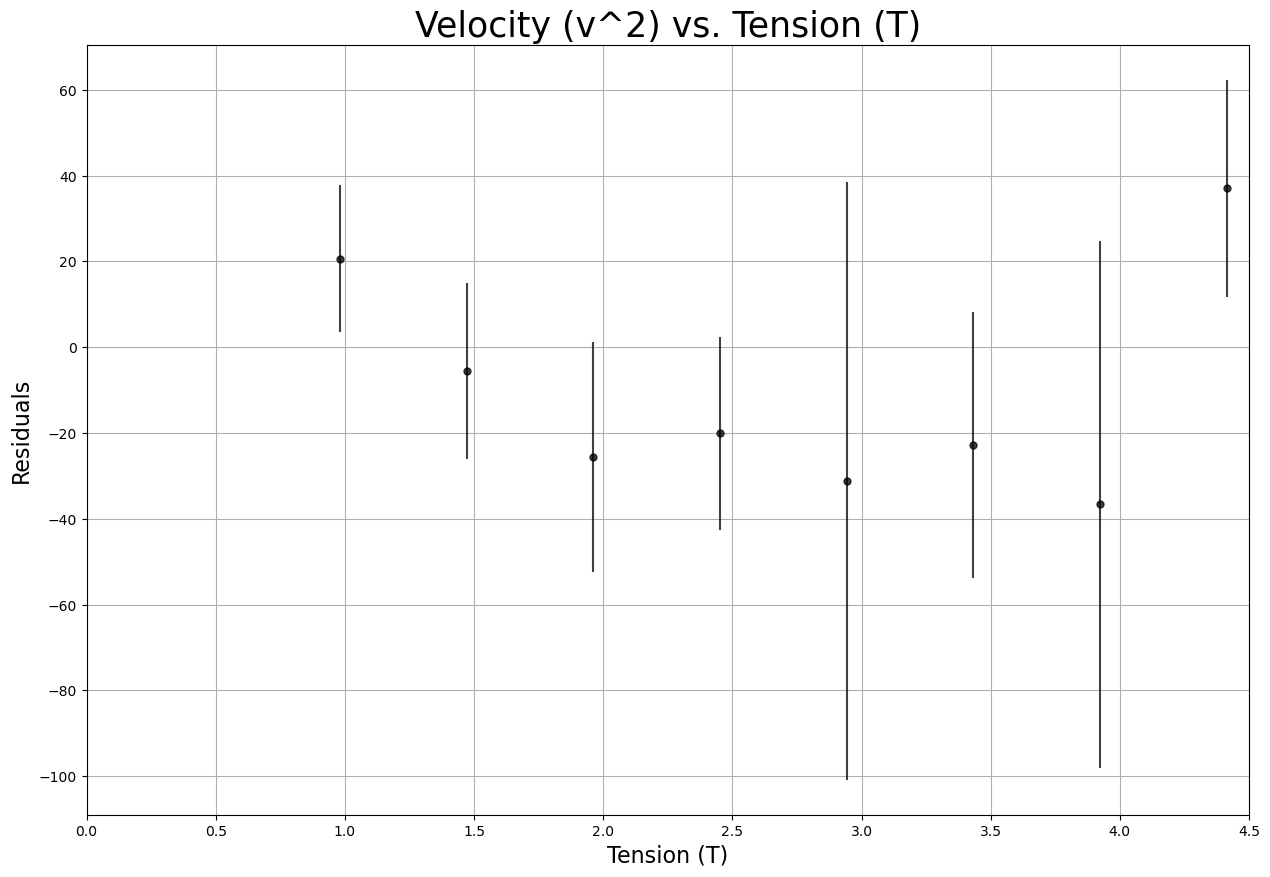

In [31]:
# Plot the residuals
plt.errorbar(x_var, residual, yerr=y_uncertainty, fmt="o", ms=5, color="black", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel("Residuals", fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# Set the axis limits for the residuals plot
ymin_r=-5
ymax_r=11
# plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_residuals", bbox_inches="tight", dpi=300)  # Saves the figure

Lets also calculate the $\chi^2$ value for our fit. This indicates the goodness-of-fit:
- $\chi^2>>1$ indicates the model is not a good fit to the data, or uncertainties are likely underestimated.
- $\chi^2\sim1$ indicates the model is a good fit to the data.
- $\chi^2<<1$ indicates the model is "too good" a fit, i.e. the uncertainties are likely overestimated.

In [32]:
ndof = len(x_var) - len(optimized_parameters) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
ru = residual / y_uncertainty
chisq = np.sum(np.power(ru, 2)) / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

Chisq 1.2972


In [33]:
string_mass = 0.55 # g
dmass = 0.005/1000 #g
string_length = 0.295 # m
dlength = 0.005 #m
mu = string_mass/1000/string_length
dmu = np.sqrt(dmass**2 + dlength**2)
print(mu, "+/-", dmu)

print(1/optimized_parameters[0])

0.0018644067796610173 +/- 0.005000002499999375
0.0011278771685033968


In [34]:
def calculate_t_prime(A, dA, B, dB):
    # T' score formula
    t_prime = abs(A - B) / np.sqrt(dA**2 + dB**2)
    return t_prime

# Example values (replace with your own data)
A = 1/optimized_parameters[0]     # Measurement A
dA = 1/parameter_errors[0]    # Uncertainty in A
B = mu     # Measurement B
dB = dmu    # Uncertainty in B

# Calculate T' score
t_prime = calculate_t_prime(A, dA, B, dB)

print(f"T' score: {t_prime:.2f}")


T' score: 0.01


## Summary
Though both the Iterative and Linear fitting tools did not work with our collected data, I expect our results to have a good linear fit, with high uncertainties. Due to time constraints no comparisons could be done.

Plan for improvement:
1. Figure out why fitting code is not working
    - Update, our uncertainties were not being calculated properly, resulting in plotting errors.
2. Take more data across range to reinforce trends in the data.

**Comparison with Mia and Aaliyah**
Lab Day 1: Our groups methodology was quite similar, as they took data at 0.5 cm increments over 180 seconds. Their model fit their data similarly to ours, with a good visual fit and $\chi^2 = 2.5$.

### Summary of Experiment Day 2
The results of this round were much better than Round 1. Our $\chi^2$ was 1.2972, accompanied by a significantly more accurate fit when assessed visually. Our relative uncertainty is quite low for the slope, but was substantial for the vertical offset (noted below), and our residuals were somewhat significant however we need to keep in mind the scale of the graph. Our final result for $\mu$ was very similar when comparing our parameter value of $1.128 \cdot 10^{-3}$ and our measured value of $1.194 \cdot 10^{-3}$.

Our parameters were as follows: \
Parameter #1: 886.6 ± 7.7 \
Parameter #2: 43.8 ± 19.0 \
Their relative uncertainties were: \
Parameter #1: 0.87% \
Parameter #2: 43.4%
We had a T' of 0.01, which is likely due to misjudgement in uncertainties when measuring the wire with the scale and rule, but it also indicates a high similarity between the measured and calculated values for the linear mass density.
When we compare these results with the information presented in class, we can validate the assumption that there is a relationship between transverse waves velocity and the medium characteristics provided by the equation:
$$v = \sqrt{\frac{T}{\mu}}$$

### Summary of Round 3 Data (taken with Aaliyah and Mia)
The results of data taken on Day 2 with Aaliyah and Mia was analyzed by itself, as it was highly divergent from the previous dataset taken with Alexis. This data followed a linear behaviour, with visual behaviour being supported by a value of $\chi^2 = 4.72$, with the following parameter values:

Parameter #1: 3704.1 ± 41.0 \
Parameter #2: 292.1 ± 100.0 \
Their relative uncertainties were: \
Parameter #1: 1.1% \
Parameter #2: 34.2%

The final caluated value for $\mu$ was $2.70 \cdot 10^{-4}$, which is a magnitude of 10 smaller than either value in Round 2.

I am choosing **not to use this data in my final summary**, as it was taken on a different instrument and cannot be integrated into our existing data due to its sizable difference.

**Comparison between Aaliyah and Mia, and Maddie and Selin**
Maddie and Selin:  \
Their methodology was almost identical to ours, however they started at 600g and decreased in 50g increments. They set the length of their wire 80cm, which was different from Mia/Aaliyah, and Alexis/Liam. \
Their results were:

| Quantity                  |  Value                                            |
| ----------------- | -------------------------------------------- |
| Parameter #1      | $875.8  \pm 4.9$                               |
| Parameter #2      | $94.4  \pm 7.5$                                |
| Graph $\mu$      | $1.1418 \cdot 10^{-3}  \pm 6.4  \cdot 10^{-6}$ |
| Calculated $\mu$ | $115.7  \cdot 10^{-5}  \pm 1.4  \cdot 10^{-5}$ |

When analyzing their results with a T-Score, they found a value of 0.99512 which supports the accuracy of their results. Their fitting had a $\chi^2 = 1.8867$ which suggusts that the linear model they used was a good fit for the data. \
Aaliyah and Mia: \
They used a method very similar to Maddie/Selin, and myself. Their final results were:
- Measured linear mass density of 0.00103 $\pm$ 0.00025 $\frac{kg}{m}$ with a relative uncertainty of 24.3%
- Calculated  linear mass density of 0.0010795 $\pm$ 0.0000070 $\frac{kg}{m}$ with a relative uncertainty of 0.648%
- T score of 0.198. Indicating little evidence that the two values are different. 
- $\chi^2$ value of 3.18, indicating that their linear model was a good fit for their data.

### Experimental Summary
Overall, we can make an educated statement that the relationship of $v^2 \propto \sqrt{\frac{T}{\mu}}$ behaves in a linear fashion, and we were able to calculate the linear mass density of the wire in two methods to an acceptable level of accuracy. We achieved the experimental goal to "Determine the linear mass density of a wire using two different methods: direct measurement and by measuring the speed of waves on this wire when it is under tension. Compare the results of the two methods.", as we provided empirical evidence to quantify the linear mass density, and made comparisons to results from parametric analysis.